In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import qp
import individual_metrics as inmet
import skgof
%matplotlib inline

# Test with two Gaussians

In [2]:
func1 = ss.norm(loc=3.0,scale=0.5)
x = np.arange(0.5,10.0,0.02)
y1 = func1.pdf(x)*20000./0.25*0.1
func2= ss.norm(loc=5.0,scale=0.35)
y2 = func2.pdf(x)*40000./0.35*0.1


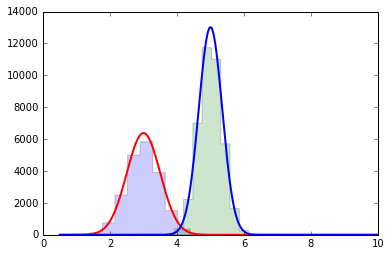

In [3]:
samples1 = np.array(func1.rvs(size=20000))
samples2 = np.array(func2.rvs(size=40000))
plt.hist(samples1, normed=False, histtype='stepfilled', alpha=0.2)
plt.hist(samples2, normed=False, histtype='stepfilled', alpha=0.2)
plt.plot(x,y1,lw=2,c='r')
plt.plot(x,y2,lw=2,c='b')

In [4]:
bigsample = np.append(samples1,samples2)
print len(bigsample)

60000


In [5]:
smallgrid=np.zeros([60000,len(y1)])
for i in range(20000):
    smallgrid[i,:] = y1
for i in range(20000,60000):
    smallgrid[i,:] = y2
approx_pdf = qp.Ensemble(smallgrid.shape[0],gridded=(x,smallgrid))

made the pool of 4 in 0.0623679161072
made the catalog in 122.718238115


In [6]:
testme = inmet.EvaluateMetric(approx_pdf,bigsample)

In [7]:
testPIT = testme.PIT()

In [8]:
ks_stat,ks_pval = testme.KS(using='gridded',dx=0.0001)

In [9]:
print ks_stat
print ks_pval

0.00265728452701
0.78956502173


In [10]:
cvm_stat,cvm_pval = testme.CvM(using='gridded',dx=0.0001)
print cvm_stat
print cvm_pval

0.0513794073338
0.867859453451


In [11]:
ad_stat,ad_pval = testme.AD(using='gridded',dx=0.0001, vmin=0.01,vmax=0.99)
print ad_stat
print ad_pval

now with proper uniform range
0.36740855471
0.88034108617


change vmin,vmax, see effect

In [14]:
ad_stat,ad_pval = testme.AD(using='gridded',dx=0.0001, vmin=0.0001,vmax=0.9999)
print ad_stat
print ad_pval

now with proper uniform range
0.323428609292
0.919578277939


In [18]:
ad_stat,ad_pval = testme.AD(using='gridded',dx=0.0001, vmin=0.000,vmax=1.0)
print ad_stat
print ad_pval

now with proper uniform range
0.322971105248
0.919958810636


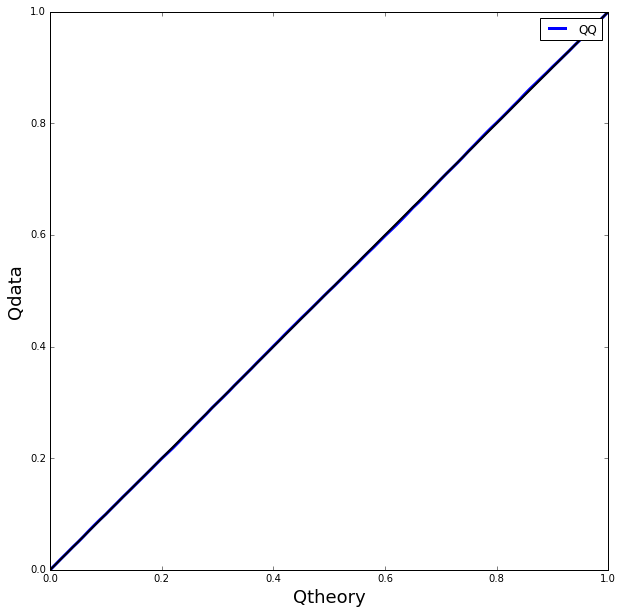

In [16]:
qqplot = testme.QQplot(using='gridded',dx=0.0001,Nquants=101)

# Test with 111k galaxies from the training sample of the DC1 data set from BPZ

In [31]:
infile = "/Users/samschmidt/PZPAPER/mystuff/test_magscat_trainingfile_probs.out"
szfile = "/Users/samschmidt/PZPAPER/mystuff/train_justsz.out"
z_array = np.arange(0.0050,2.1100,0.0100) #this is the grid output by BPZ for my runs
z_trues = np.loadtxt(szfile,skiprows=1)
alldata = np.loadtxt(infile,skiprows=1)
ID = alldata[:,0]
pzs = alldata[:,1:]
ngals = len(ID)

In [32]:
bpz_approx_pdf = qp.Ensemble(pzs.shape[0],gridded=(z_array,pzs))

made the pool of 4 in 0.00880789756775
made the catalog in 194.218545914


In [33]:
bpzobj = inmet.EvaluateMetric(bpz_approx_pdf,z_trues)

In [34]:
bpzPIT = bpzobj.PIT()

In [35]:
ks_stat,ks_pval = bpzobj.KS(using='gridded',dx=0.0001)
print ks_stat
print ks_pval

0.0522342590187
0.000148773876209


In [36]:
cvm_stat,cvm_pval=bpzobj.CvM(using='gridded',dx=0.0001)
print cvm_stat
print cvm_pval

118.865224286
0.0111390104363


In [37]:
ad_stat,ad_pval=bpzobj.AD(using='gridded',dx=0.0001,vmin=0.05,vmax=0.95)
print ad_stat
print ad_pval

now with proper uniform range
397.376691407
5.94012350419e-09


In [40]:
ad_stat,ad_pval=bpzobj.AD(using='gridded',dx=0.0001,vmin=0.1,vmax=0.9)
print ad_stat
print ad_pval

now with proper uniform range
182.847416027
6.5467162802e-09


In [39]:
ad_stat,ad_pval=bpzobj.AD(using='gridded',dx=0.0001,vmin=0.0,vmax=1.0)
print ad_stat
print ad_pval

now with proper uniform range
754.487072267
5.39966527047e-09


In [41]:
ad_stat,ad_pval=bpzobj.AD(using='gridded',dx=0.0001,vmin=0.8,vmax=0.95)
print ad_stat
print ad_pval

now with proper uniform range
0.424200293142
0.824431592523


In [51]:
ad_stat,ad_pval=bpzobj.AD(using='gridded',dx=0.0001,vmin=0.8,vmax=1.0)
print ad_stat
print ad_pval

now with proper uniform range
175.692904614
2.56717439528e-08


As an aside, the high p-values look good for BPZ, it's the low PIT percentiles that are off.  But, including the values of 1.0 does take the AD statistic back to a very large number, so outlier trimming is necessary

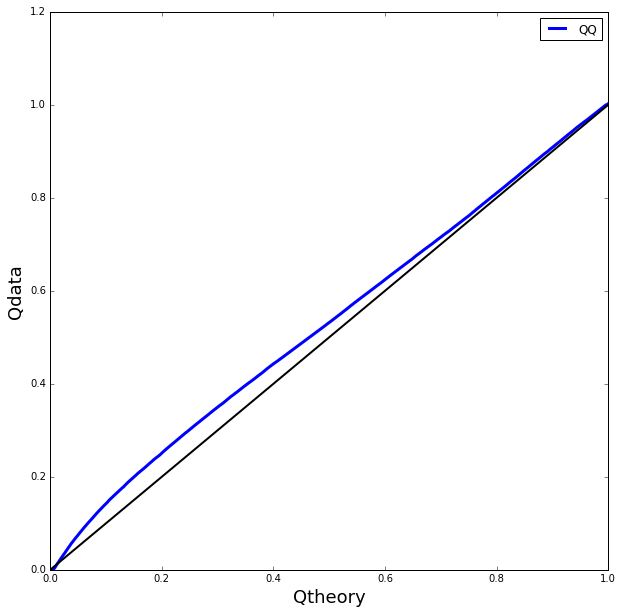

In [38]:
bpzobj.QQplot(using='gridded',dx=0.0001,Nquants=1001)

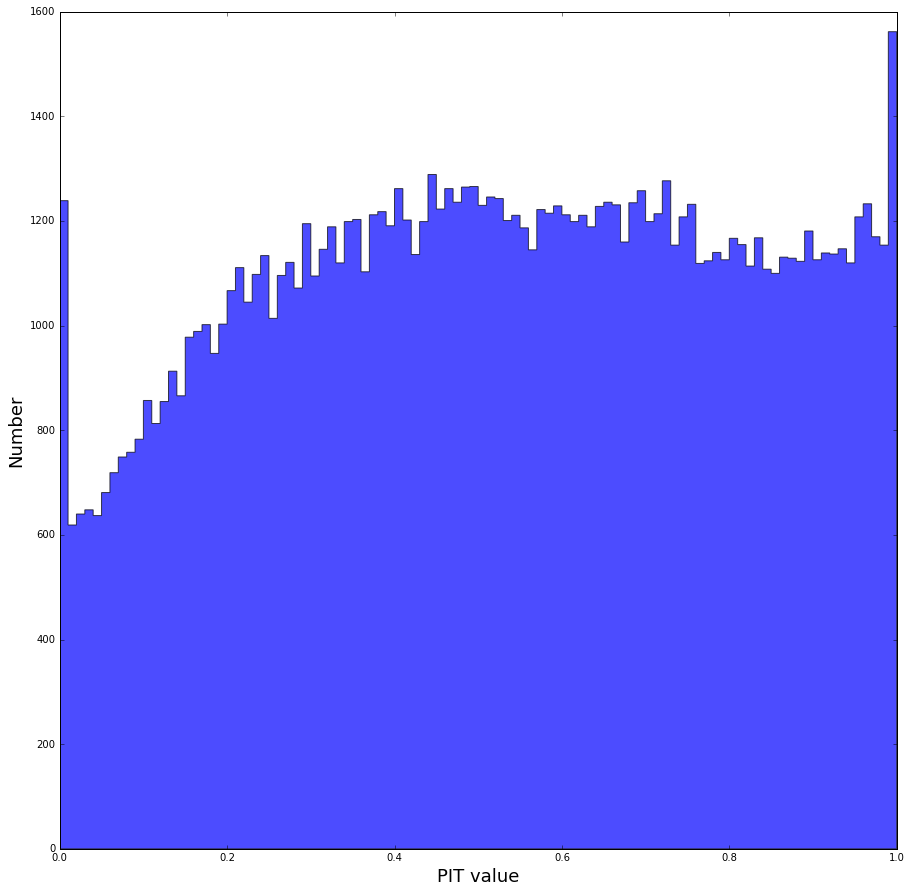

In [52]:
fig = plt.figure(figsize=(15,15))
plt.hist(bpzPIT, normed=False, histtype='stepfilled', alpha=0.7,bins=np.arange(0.0,1.01,.01))
plt.xlim([0.0,1.0])
plt.xlabel("PIT value",size=18)
plt.ylabel("Number",size=18)

# Make i<25.3 gold cut

In [55]:
newfile = "train_idszmag.out"
newdata = np.genfromtxt(newfile)
mags = newdata[:,2]

In [58]:
magcut = (mags<25.3)
goldzs = z_trues[magcut]
goldpzs = pzs[magcut]
goldnumgals = len(cutzs)
print goldnumgals
print goldpzs.shape

44404
(44404, 211)


In [60]:
gold_pdf = qp.Ensemble(goldpzs.shape[0],gridded=(z_array,goldpzs))

made the pool of 4 in 0.0213971138
made the catalog in 84.8325541019


In [61]:
goldbpzobj = inmet.EvaluateMetric(gold_pdf,goldzs)

In [62]:
goldPIT = goldbpzobj.PIT()

In [63]:
ks_stat,ks_pval = goldbpzobj.KS(using='gridded',dx=0.0001)
print ks_stat
print ks_pval

0.0397769328386
1.75620833201e-61


In [64]:
cvm_stat,cvm_pval=goldbpzobj.CvM(using='gridded',dx=0.0001)
print cvm_stat
print cvm_pval

26.9731544947
3.91808660516e-06


In [65]:
ad_stat,ad_pval=goldbpzobj.AD(using='gridded',dx=0.0001,vmin=0.05,vmax=0.95)
print ad_stat
print ad_pval

now with proper uniform range
159.346793582
1.54464009361e-08


In [70]:
ad_stat,ad_pval=goldbpzobj.AD(using='gridded',dx=0.0001,vmin=0.1,vmax=0.9)
print ad_stat
print ad_pval

now with proper uniform range
125.920158905
1.7195425972e-08


In [72]:
ad_stat,ad_pval=goldbpzobj.AD(using='gridded',dx=0.0001,vmin=0.8,vmax=0.95)
print ad_stat
print ad_pval

now with proper uniform range
0.797704097785
0.482697266929


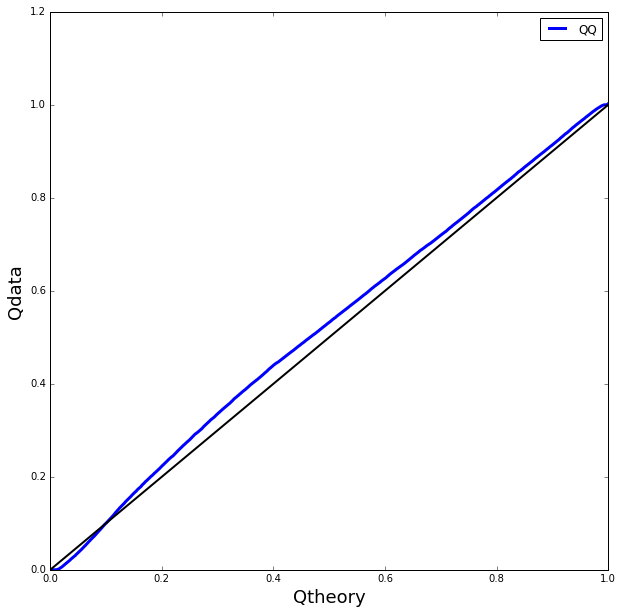

In [67]:
goldbpzobj.QQplot(using='gridded',dx=0.0001,Nquants=1001)

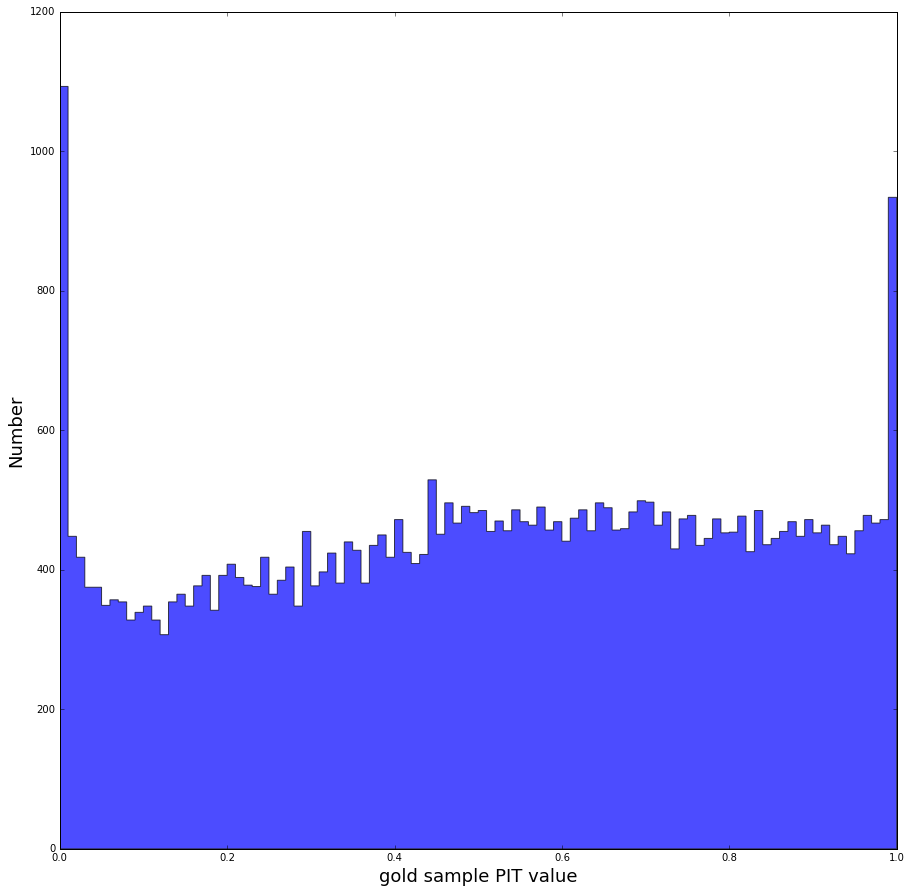

In [68]:
fig = plt.figure(figsize=(15,15))
plt.hist(goldPIT, normed=False, histtype='stepfilled', alpha=0.7,bins=np.arange(0.0,1.01,.01))
plt.xlim([0.0,1.0])
plt.xlabel("gold sample PIT value",size=18)
plt.ylabel("Number",size=18)